

# Project: TMDb movie data analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

###  1.Data source: tmdb-movies.csv
For the project I have chosen to analysis the TMDb dataset. This dataset contains information about 10,000 movies collected from the Movie Database(TMDb), and cleaned from original data on Kaggle.

###  2.Questions:
* Which genres are most popular from year to year? 
* What kinds of properties are associated with movies that have high revenues?


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [84]:
# Load the data and check 
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#See the dimesions of the dataframe
df.shape

(10866, 21)

In [4]:
#See the descriptive statistics for each column of the data 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#See the column's name and the number of non-null values in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

#### Drop the irrelevant columns
Since our questions is basically about the movie's properties and their revenue or popularity, we can drop the column's which have no relations with our questions. 
* **imdb_id**: It seems repeated with the id which also identify the movie and it have null vaules so we can keep the id and drop the imdb_id.
* **budget and revenue**: Since the budget_adj and revenue_adj are accounting for inflation over time, which maybe more justified, so we will keep it and drop the budget and revenue columns.
* **homepage,tagline,overview,and keywords**:These informations is related to the movie's content, seems unrelated with our analysis.
* **release_year**: Since the release data already included the release year, we can drop it.

In [6]:
#Drop the columns that irrelevant with our analysis.
df.drop(['imdb_id','budget','revenue','homepage','tagline','keywords','overview'],axis=1,inplace=True)

In [7]:
#Check the new dataframe
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
#Check the statistics of the new dataframe
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### The descriptive statistics of the dataset  
From the descriptive statistics we can find that the format of the id is not unify, the minimum id is 5, but the maximum id is 417859. We also can see that over 50% movies have zero budget and zero revenue which is a little bit strange. And it seems have several outliers of the popularity and runtime. We have to explore tha data further and deal with these problems.

In [9]:
#Check the new dataframe's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   original_title        10866 non-null  object 
 3   cast                  10790 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
 12  budget_adj            10866 non-null  float64
 13  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


In [10]:
#Check the sum of null vaules in each column
df.isnull().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
#Check the duplicated data 
df[df.duplicated()]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,0.59643,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


#### Drop the null value of genres and the duplicated data
The other column's contain the null value need to be further explored.

In [12]:
df.drop_duplicates(inplace=True)
df.dropna(subset=['genres'],axis=0,inplace=True)

In [13]:
#Check the sum of null values after cleaning the null value of genres
df.isnull().sum()

id                         0
popularity                 0
original_title             0
cast                      75
director                  42
runtime                    0
genres                     0
production_companies    1016
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
#Check the duplicated data 
df.duplicated().sum()

0

In [15]:
#See the data that the columns of cast is null.
df[df.cast.isnull()]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,0.422901,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015,0.000000,0.0
441,355020,0.220751,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015,0.000000,0.0
465,321109,0.201696,Bitter Lake,NaN,Adam Curtis,135,Documentary,BBC,1/24/15,19,7.8,2015,0.000000,0.0
536,333350,0.122543,A Faster Horse,NaN,David Gelb,90,Documentary,NaN,10/8/15,12,8.0,2015,0.000000,0.0
538,224972,0.114264,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,NaN,1/1/15,11,8.9,2015,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,13926,0.253376,Red's Dream,NaN,John Lasseter,4,Animation,Pixar Animation Studios,8/17/87,44,6.6,1987,0.000000,0.0
9755,48714,0.046272,The Big Shave,NaN,Martin Scorsese,6,Drama,NaN,1/1/68,12,6.7,1968,0.000000,0.0
10434,48784,0.146906,Six Men Getting Sick,NaN,David Lynch,4,Animation,Pensylvania Academy of Fine Arts,1/1/67,16,5.2,1967,1307.352748,0.0
10550,13925,0.306425,Luxo Jr.,NaN,John Lasseter,2,Animation|Family,Pixar Animation Studios,8/17/86,81,7.3,1986,0.000000,0.0


In [16]:
#See the data that the columns of production companies is null.
df[df.director.isnull()]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,320996,0.126594,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,New Wave Entertainment,1/23/15,14,6.6,2015,0.000000e+00,0.000000e+00
548,355131,0.108072,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000e+00,0.000000e+00
556,321160,0.100910,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,1/24/15,14,6.5,2015,0.000000e+00,0.000000e+00
1032,259910,0.291253,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,43,TV Movie|Documentary,Marvel Studios|ABC Studios,3/18/14,32,6.3,2014,0.000000e+00,0.000000e+00
1054,253675,0.269468,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,60,TV Movie|Documentary,NaN,1/19/14,11,7.2,2014,0.000000e+00,0.000000e+00
1203,256561,0.119891,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,NaN,75,Documentary,Valve,3/19/14,40,7.0,2014,1.381637e+05,0.000000e+00
1241,296370,0.135376,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.000000e+00
1288,301235,0.038364,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,NaN,94,Documentary,2 Entertain Video,11/17/14,12,6.8,2014,0.000000e+00,0.000000e+00
1852,133365,0.256703,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,100,Drama,Darlow Smithson Productions|British Broadcasti...,1/9/09,19,7.5,2009,0.000000e+00,0.000000e+00
1872,26379,0.091395,Paa,Amitabh Bachchan|Abhishek Bachchan|Vidya Balan...,NaN,133,Drama|Family|Foreign,A B Corp,12/4/09,11,6.1,2009,3.303301e+06,0.000000e+00


In [17]:
#See the data that the columns of production companies is null.
df[df.production_companies.isnull()]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,300792,0.584363,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,Louie Psihoyos,90,Adventure|Documentary,NaN,1/24/15,36,7.8,2015,0.0,0.0
259,360603,0.476341,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,Alex Zamm,84,TV Movie,NaN,11/27/15,10,7.6,2015,0.0,0.0
295,363483,0.417191,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,Peter Sullivan,84,Family|TV Movie,NaN,11/26/15,12,6.3,2015,0.0,0.0
298,354220,0.370258,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,Nick Simon,95,Crime|Horror|Thriller,NaN,9/14/15,10,4.7,2015,0.0,0.0
328,308457,0.367617,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,Jennifer Phang,92,Science Fiction|Drama|Family,NaN,6/23/15,29,6.4,2015,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10804,15867,0.149259,Interiors,Diane Keaton|Kristin Griffith|Mary Beth Hurt|R...,Woody Allen,93,Drama,NaN,8/2/78,35,6.3,1978,0.0,0.0
10806,24998,0.138635,Gates of Heaven,Lucille Billingsley|Zella Graham|Cal Harberts|...,Errol Morris,85,Documentary,NaN,10/1/78,12,5.9,1978,0.0,0.0
10816,16378,0.064602,The Rutles: All You Need Is Cash,Eric Idle|John Halsey|Ricky Fataar|Neil Innes|...,Eric Idle|Gary Weis,76,Comedy,NaN,3/22/78,14,6.0,1978,0.0,0.0
10842,36540,0.253437,Winnie the Pooh and the Honey Tree,Sterling Holloway|Junius Matthews|Sebastian Ca...,Wolfgang Reitherman,25,Animation|Family,NaN,1/1/66,12,7.9,1966,0.0,0.0


#### Keep the null vaule of the cast, director and the production companies
It seems no special attribute of these null values.Since our first question is about genres and popularity, these null value of cast,director and production companies have no effect to our analysis.However, if we drop the rows that contains these null value it will lose too much information(there have 1016 rows which production companies contains null value). 

In [18]:
#Check the types of the data 
df.dtypes

id                        int64
popularity              float64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [19]:
df['release_date'] = df['release_date'].map(lambda x: str(x)[:-2])

In [20]:
df['release_date']=df['release_date']+df['release_year'].map(str)

In [21]:
#Change the data type of release_date to datetime
df.release_date=pd.to_datetime(df.release_date)

In [22]:
df.dtypes

id                               int64
popularity                     float64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

#### Change the release_date column from object to datetime
Since we need to anlysis the popularity of movies from time to time, we need to transfer the data to appropriate datetype.

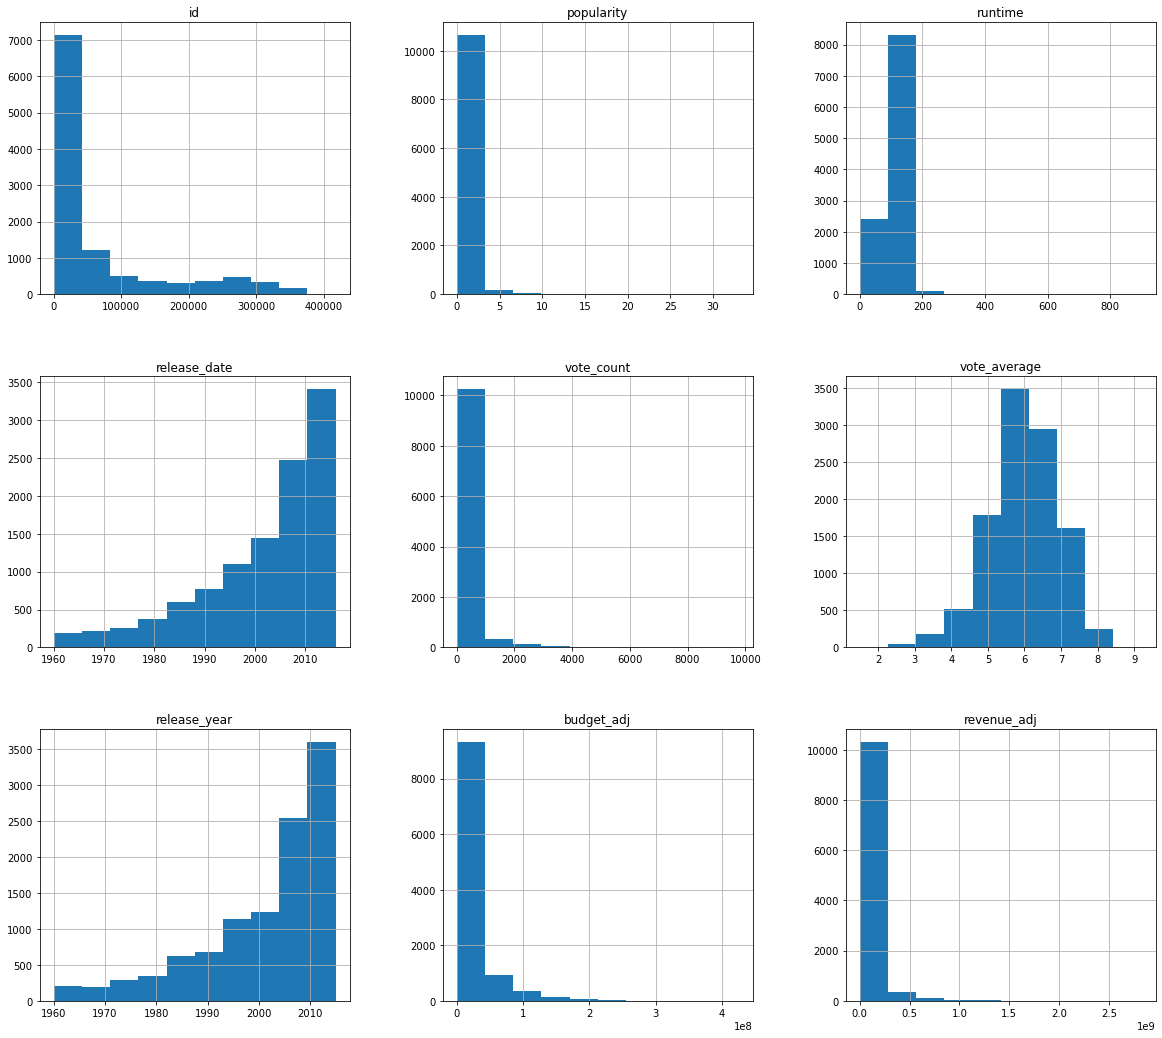

In [23]:
#See the whole dataset's histgram 
df.hist(figsize=(20,18));

#### Overall insights of the dataset 
As we can see from the histogram,although we cleaned the null value of the data, but serveral columns still have a big amount of "0" values. The runtime,budget_adj,revenue_adj are important date that we need to analysis our second and third question. We will deal with it the research question 2 and question 3. The columns of popularity and the release_time which is related to the first question seems to be cleaned and the amount of movies released increased with time which is also resonable.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 Which genres are most popular from year to year?

In [24]:
#Check the unique genres of the dataset 
df.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

As we can see, there have lots of Movie has much more than one genre, for better analysis the relativeness between the genres and the popularity, we need to process the genre data.

In [26]:
#Remove the | of the genres
df.genres=df.genres.apply(lambda x: str(x).split('|'))

In [27]:
# Check the genres
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [29]:
#Separate the diffrent genres
df=df.explode('genres')

In [30]:
#Check the genres
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [32]:
#Check the counts of the different genres
df.genres.value_counts()

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

In [33]:
#Check the unique vaule of the release_year 
release_year=df.release_year.unique()
print(np.sort(release_year))

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]


In [34]:
#Create a new dataframe that only contains the genres ,release_year and the mean popularity
popularity_genres=df.groupby(['genres','release_year'],as_index=False)['popularity'].mean()
popularity_genres

,genres,release_year,popularity
0,Action,1960,0.590724
1,Action,1961,0.365913
2,Action,1962,0.708945
3,Action,1963,0.951729
4,Action,1964,0.813087
...,...,...,...
1044,Western,2011,1.175800
1045,Western,2012,1.732778
1046,Western,2013,0.665255
1047,Western,2014,0.673947


In [35]:
#Make a new dataframe that the release year is 1960
year_1960=popularity_genres[popularity_genres['release_year']==1960]

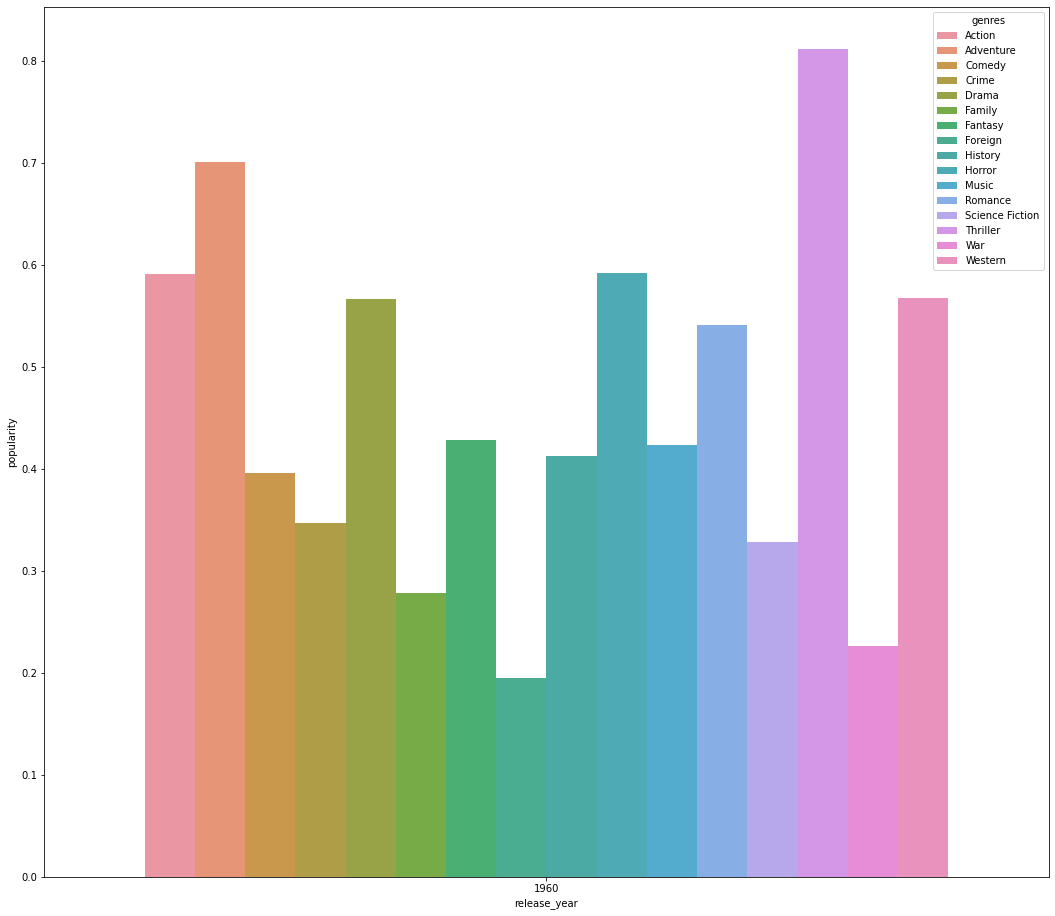

In [36]:
#Check which genre is most popular in the 1960
plt.figure(figsize=(18,16))
ax = sns.barplot(data=year_1960, x='release_year', y='popularity',hue='genres')
plt.show()

From the bar plot above, we can see that the genre of Thriller is the most popular in 1960.

In [37]:
#build the new dataframe for each year
year_1961=popularity_genres[popularity_genres['release_year']==1961]
year_1962=popularity_genres[popularity_genres['release_year']==1962]
year_1963=popularity_genres[popularity_genres['release_year']==1963]
year_1964=popularity_genres[popularity_genres['release_year']==1964]
year_1965=popularity_genres[popularity_genres['release_year']==1965]
year_1966=popularity_genres[popularity_genres['release_year']==1966]
year_1967=popularity_genres[popularity_genres['release_year']==1967]
year_1968=popularity_genres[popularity_genres['release_year']==1968]
year_1969=popularity_genres[popularity_genres['release_year']==1969]
year_1970=popularity_genres[popularity_genres['release_year']==1970]
year_1971=popularity_genres[popularity_genres['release_year']==1971]
year_1972=popularity_genres[popularity_genres['release_year']==1972]
year_1973=popularity_genres[popularity_genres['release_year']==1973]
year_1974=popularity_genres[popularity_genres['release_year']==1974]
year_1975=popularity_genres[popularity_genres['release_year']==1975]
year_1976=popularity_genres[popularity_genres['release_year']==1976]
year_1977=popularity_genres[popularity_genres['release_year']==1977]
year_1978=popularity_genres[popularity_genres['release_year']==1978]
year_1979=popularity_genres[popularity_genres['release_year']==1979]
year_1980=popularity_genres[popularity_genres['release_year']==1980]
year_1981=popularity_genres[popularity_genres['release_year']==1981]
year_1982=popularity_genres[popularity_genres['release_year']==1982]
year_1983=popularity_genres[popularity_genres['release_year']==1983]
year_1984=popularity_genres[popularity_genres['release_year']==1984]
year_1985=popularity_genres[popularity_genres['release_year']==1985]
year_1986=popularity_genres[popularity_genres['release_year']==1986]
year_1987=popularity_genres[popularity_genres['release_year']==1987]
year_1988=popularity_genres[popularity_genres['release_year']==1988]
year_1989=popularity_genres[popularity_genres['release_year']==1989]
year_1990=popularity_genres[popularity_genres['release_year']==1990]
year_1991=popularity_genres[popularity_genres['release_year']==1991]
year_1992=popularity_genres[popularity_genres['release_year']==1992]
year_1993=popularity_genres[popularity_genres['release_year']==1993]
year_1994=popularity_genres[popularity_genres['release_year']==1994]
year_1995=popularity_genres[popularity_genres['release_year']==1995]
year_1996=popularity_genres[popularity_genres['release_year']==1996]
year_1997=popularity_genres[popularity_genres['release_year']==1997]
year_1998=popularity_genres[popularity_genres['release_year']==1998]
year_1999=popularity_genres[popularity_genres['release_year']==1999]
year_2000=popularity_genres[popularity_genres['release_year']==2000]
year_2001=popularity_genres[popularity_genres['release_year']==2001]
year_2002=popularity_genres[popularity_genres['release_year']==2002]
year_2003=popularity_genres[popularity_genres['release_year']==2003]
year_2004=popularity_genres[popularity_genres['release_year']==2004]
year_2005=popularity_genres[popularity_genres['release_year']==2005]
year_2006=popularity_genres[popularity_genres['release_year']==2006]
year_2007=popularity_genres[popularity_genres['release_year']==2007]
year_2008=popularity_genres[popularity_genres['release_year']==2008]
year_2009=popularity_genres[popularity_genres['release_year']==2009]
year_2010=popularity_genres[popularity_genres['release_year']==2010]
year_2011=popularity_genres[popularity_genres['release_year']==2011]
year_2012=popularity_genres[popularity_genres['release_year']==2012]
year_2013=popularity_genres[popularity_genres['release_year']==2013]
year_2014=popularity_genres[popularity_genres['release_year']==2014]
year_2015=popularity_genres[popularity_genres['release_year']==2015]

In [38]:
#Build the new dataframe that cotains each year's most popular genre.
year_1960_max=year_1960[year_1960['popularity']==year_1960['popularity'].max()]
year_1961_max=year_1961[year_1961['popularity']==year_1961['popularity'].max()]
year_1962_max=year_1962[year_1962['popularity']==year_1962['popularity'].max()]
year_1963_max=year_1963[year_1963['popularity']==year_1963['popularity'].max()]
year_1964_max=year_1964[year_1964['popularity']==year_1964['popularity'].max()]
year_1965_max=year_1965[year_1965['popularity']==year_1965['popularity'].max()]
year_1966_max=year_1966[year_1966['popularity']==year_1966['popularity'].max()]
year_1967_max=year_1967[year_1967['popularity']==year_1967['popularity'].max()]
year_1968_max=year_1968[year_1968['popularity']==year_1968['popularity'].max()]
year_1969_max=year_1969[year_1969['popularity']==year_1969['popularity'].max()]
year_1970_max=year_1970[year_1970['popularity']==year_1970['popularity'].max()]
year_1971_max=year_1971[year_1971['popularity']==year_1971['popularity'].max()]
year_1972_max=year_1972[year_1972['popularity']==year_1972['popularity'].max()]
year_1973_max=year_1973[year_1973['popularity']==year_1973['popularity'].max()]
year_1974_max=year_1974[year_1974['popularity']==year_1974['popularity'].max()]
year_1975_max=year_1975[year_1975['popularity']==year_1975['popularity'].max()]
year_1976_max=year_1976[year_1976['popularity']==year_1976['popularity'].max()]
year_1977_max=year_1977[year_1977['popularity']==year_1977['popularity'].max()]
year_1978_max=year_1978[year_1978['popularity']==year_1978['popularity'].max()]
year_1979_max=year_1979[year_1979['popularity']==year_1979['popularity'].max()]
year_1980_max=year_1980[year_1980['popularity']==year_1980['popularity'].max()]
year_1981_max=year_1981[year_1981['popularity']==year_1981['popularity'].max()]
year_1982_max=year_1982[year_1982['popularity']==year_1982['popularity'].max()]
year_1983_max=year_1983[year_1983['popularity']==year_1983['popularity'].max()]
year_1984_max=year_1984[year_1984['popularity']==year_1984['popularity'].max()]
year_1985_max=year_1985[year_1985['popularity']==year_1985['popularity'].max()]
year_1986_max=year_1986[year_1986['popularity']==year_1986['popularity'].max()]
year_1987_max=year_1987[year_1987['popularity']==year_1987['popularity'].max()]
year_1988_max=year_1988[year_1988['popularity']==year_1988['popularity'].max()]
year_1989_max=year_1989[year_1989['popularity']==year_1989['popularity'].max()]
year_1990_max=year_1990[year_1990['popularity']==year_1990['popularity'].max()]
year_1991_max=year_1991[year_1991['popularity']==year_1991['popularity'].max()]
year_1992_max=year_1992[year_1992['popularity']==year_1992['popularity'].max()]
year_1993_max=year_1993[year_1993['popularity']==year_1993['popularity'].max()]
year_1994_max=year_1994[year_1994['popularity']==year_1994['popularity'].max()]
year_1995_max=year_1995[year_1995['popularity']==year_1995['popularity'].max()]
year_1996_max=year_1996[year_1996['popularity']==year_1996['popularity'].max()]
year_1997_max=year_1997[year_1997['popularity']==year_1997['popularity'].max()]
year_1998_max=year_1998[year_1998['popularity']==year_1998['popularity'].max()]
year_1999_max=year_1999[year_1999['popularity']==year_1999['popularity'].max()]
year_2000_max=year_2000[year_2000['popularity']==year_2000['popularity'].max()]
year_2001_max=year_2001[year_2001['popularity']==year_2001['popularity'].max()]
year_2002_max=year_2002[year_2002['popularity']==year_2002['popularity'].max()]
year_2003_max=year_2003[year_2003['popularity']==year_2003['popularity'].max()]
year_2004_max=year_2004[year_2004['popularity']==year_2004['popularity'].max()]
year_2005_max=year_2005[year_2005['popularity']==year_2005['popularity'].max()]
year_2006_max=year_2006[year_2006['popularity']==year_2006['popularity'].max()]
year_2007_max=year_2007[year_2007['popularity']==year_2007['popularity'].max()]
year_2008_max=year_2008[year_2008['popularity']==year_2008['popularity'].max()]
year_2009_max=year_2009[year_2009['popularity']==year_2009['popularity'].max()]
year_2010_max=year_2010[year_2010['popularity']==year_2010['popularity'].max()]
year_2011_max=year_2011[year_2011['popularity']==year_2011['popularity'].max()]
year_2012_max=year_2012[year_2012['popularity']==year_2012['popularity'].max()]
year_2013_max=year_2013[year_2013['popularity']==year_2013['popularity'].max()]
year_2014_max=year_2014[year_2014['popularity']==year_2014['popularity'].max()]
year_2015_max=year_2015[year_2015['popularity']==year_2015['popularity'].max()]

In [39]:
#Merge the dataframes
data=[year_1960_max,year_1961_max,year_1962_max,year_1963_max,year_1964_max,year_1965_max,year_1966_max,year_1967_max,year_1968_max,year_1969_max,year_1970_max,year_1971_max,year_1972_max,year_1973_max,year_1974_max,year_1975_max,year_1976_max,year_1977_max,year_1978_max,year_1979_max,year_1980_max,year_1971_max,year_1972_max,year_1973_max,year_1974_max,year_1975_max,year_1976_max,year_1977_max,year_1978_max,year_1981_max,year_1982_max,year_1983_max,year_1984_max,year_1985_max,year_1986_max,year_1987_max,year_1988_max,year_1989_max,year_1990_max,year_1991_max,year_1992_max,year_1993_max,year_1994_max,year_1995_max,year_1996_max,year_1997_max,year_1998_max,year_1999_max,year_2000_max,year_2001_max,year_2002_max,year_2003_max,year_2004_max,year_2005_max,year_2006_max,year_2007_max,year_2008_max,year_2009_max,year_2010_max,year_2011_max,year_2012_max,year_2013_max,year_2014_max,year_2015_max]
genre_popularity_max= pd.concat(data)
genre_popularity_max.head()


,genres,release_year,popularity
890,Thriller,1960,0.811910
112,Animation,1961,2.631987
58,Adventure,1962,0.942513
113,Animation,1963,2.180410
949,War,1964,0.930959


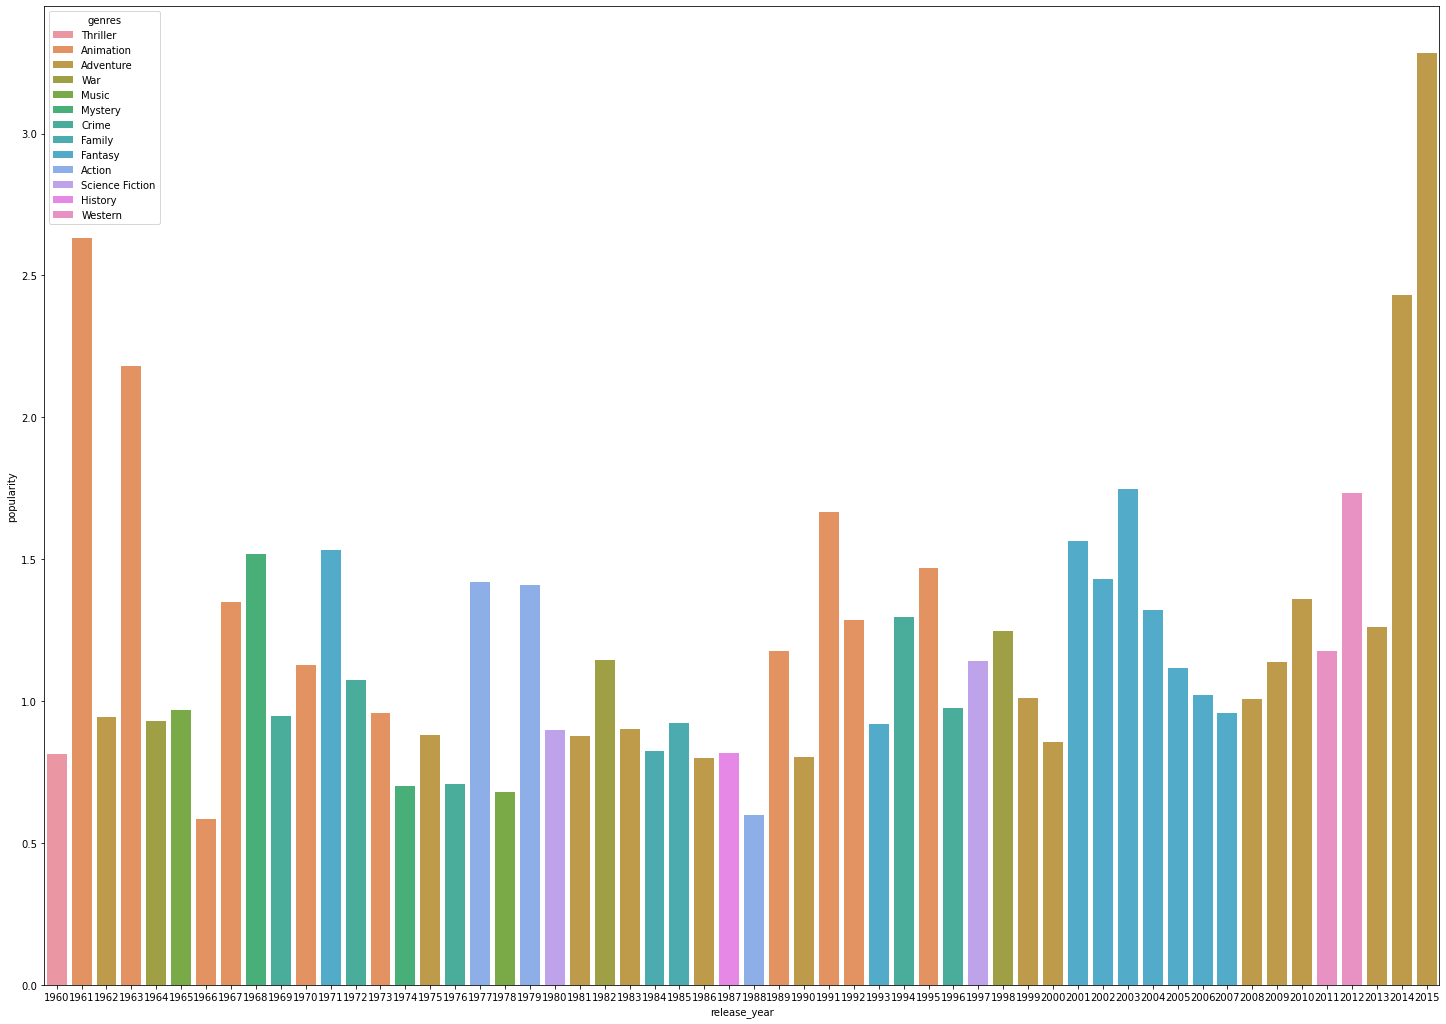

In [40]:
plt.figure(figsize=(25,18))
ax = sns.barplot(data=genre_popularity_max, x='release_year', y='popularity',hue="genres",dodge=False)
plt.show()

#### The first question insights from the  data analysis
As we can see from the scatter plot above, the most popular genres are shift from year to year, I will explain the  detail in the conclusion part.

### Research Question 2  What kinds of properties are associated with movies that have high revenues?

In [42]:
#Check the rows that contains the null vaule.
df.isnull().sum()

id                         0
popularity                 0
original_title             0
cast                     124
director                  91
runtime                    0
genres                     0
production_companies    2198
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [45]:
#Drop the rows that contains null 
df2=df
df2.dropna(subset=['cast','production_companies','director'],axis=0,inplace=True)
df2.isnull().sum()

id                      0
popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

From initial data describe, we can see that many columns, such as budget_adj and revenue_adj and runtime is 0.Inorder to provide a proper analysis, these rows contains 0 value will be drop. 

In [46]:
# Drop the rows that contains value 0.
df2['revenue_adj'].replace(0, np.NAN, inplace=True)
df2['budget_adj'].replace(0, np.NAN, inplace=True)
df2['runtime'].replace(0, np.NAN, inplace=True)
df2.dropna(axis=0, inplace=True)

In [47]:
#Check the new dataframe
df2.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10180.000000,10180.000000,10180.000000,10180.000000,10180.000000,10180.000000,1.018000e+04,1.018000e+04
mean,36469.935953,1.274476,109.676719,580.628585,6.157623,2000.887132,5.004588e+07,1.534561e+08
std,63438.377443,1.613311,20.233879,944.192959,0.788220,11.321683,4.771353e+07,2.332807e+08
min,5.000000,0.010335,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,5255.000000,0.487399,96.000000,78.000000,5.700000,1995.000000,1.600935e+07,2.150686e+07
50%,10987.000000,0.856329,106.000000,230.000000,6.200000,2004.000000,3.489833e+07,6.980286e+07
75%,34769.000000,1.470711,119.000000,645.000000,6.700000,2010.000000,7.035940e+07,1.859055e+08
max,417859.000000,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [156]:
#Calculate the mean vaule of the revenue 
rev_mean=df2.revenue_adj.mean()
print("The mean vaule of is $:",rev_mean)

The mean vaule of is $: 153456063.52896655


#### Property 1 : What genres are assciated with high revenue?

In [81]:
#Caculate the average revenre of different genre in ascending order
genres_revenues =df2.groupby('genres',as_index=False)['revenue_adj'].mean().sort_values(by=['revenue_adj'])
genres_revenues

,genres,revenue_adj
9,Foreign,8.124933e+06
5,Documentary,3.150497e+07
16,TV Movie,5.838910e+07
11,Horror,8.198614e+07
6,Drama,1.028410e+08
4,Crime,1.107199e+08
13,Mystery,1.137279e+08
14,Romance,1.149854e+08
10,History,1.225795e+08
3,Comedy,1.232566e+08


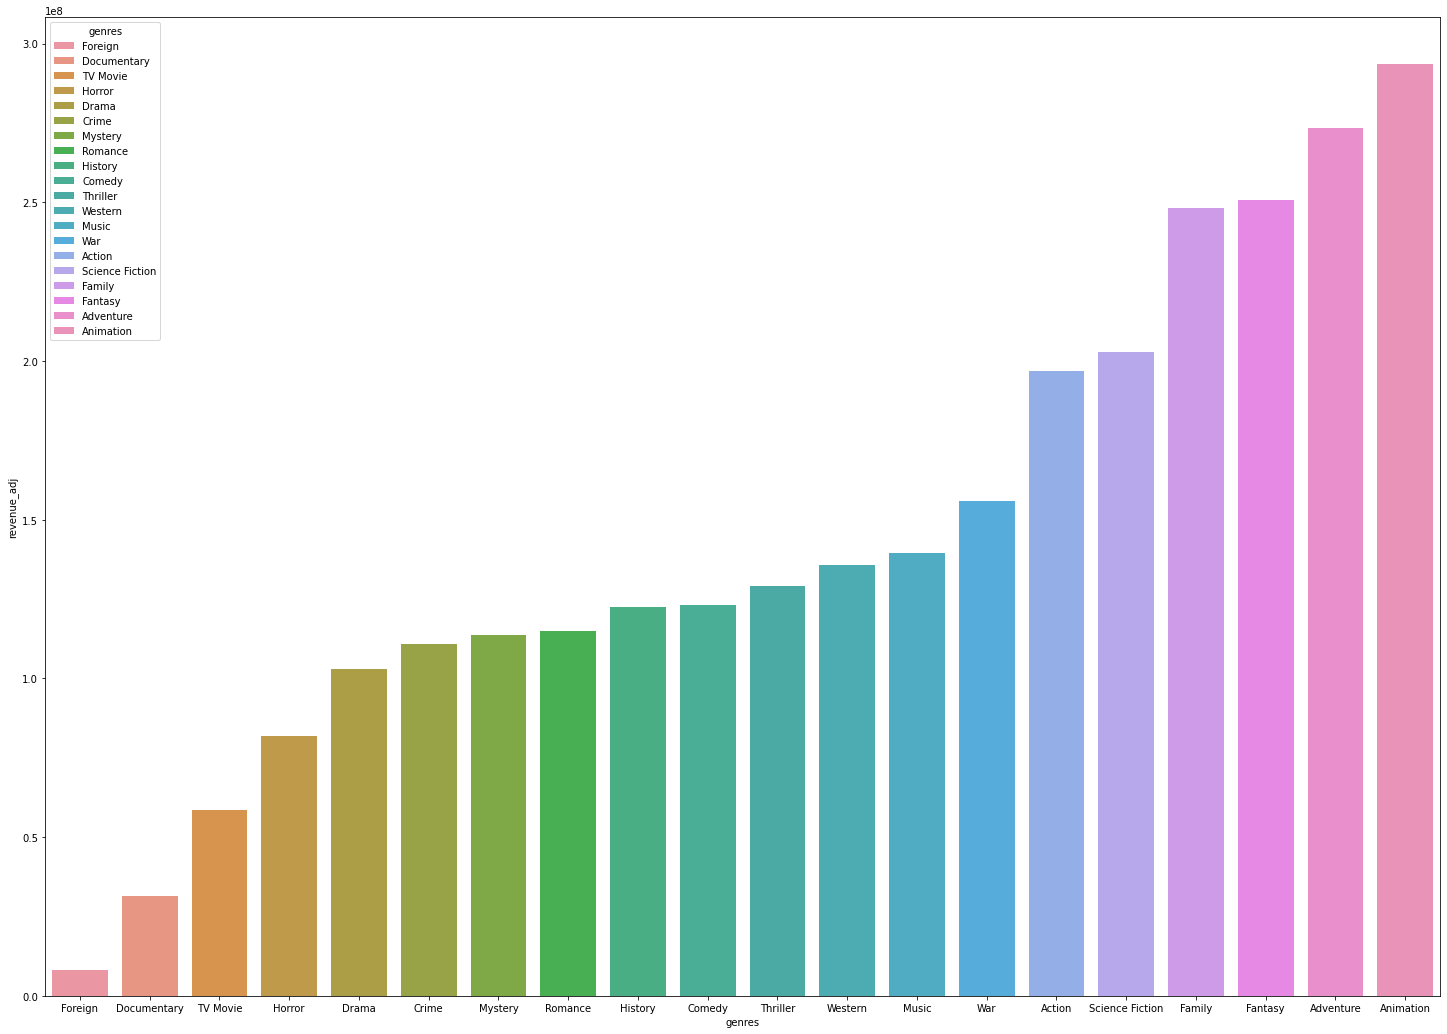

In [82]:
#Plot the bar plot for the revenues of different genres 
plt.figure(figsize=(25,18))
ax = sns.barplot(data=genres_revenues, x='genres', y='revenue_adj',hue="genres",dodge=False)
plt.show()

From the bar plot above, we can see that animation has the most revenue.

#### Property 2 :  The influence of  the movie's runtime of the revenue?

In [153]:
#Make a new data frame that only contains revenue and runtime
runtime_revenue=df2.groupby('runtime',as_index=False)['revenue_adj'].mean().sort_values(by=['runtime'])
runtime_revenue.head()

,runtime,revenue_adj
0,15.0,5.926763e+00
1,26.0,4.597555e+07
2,63.0,1.401750e+07
3,66.0,3.836488e+05
4,69.0,1.557366e+08


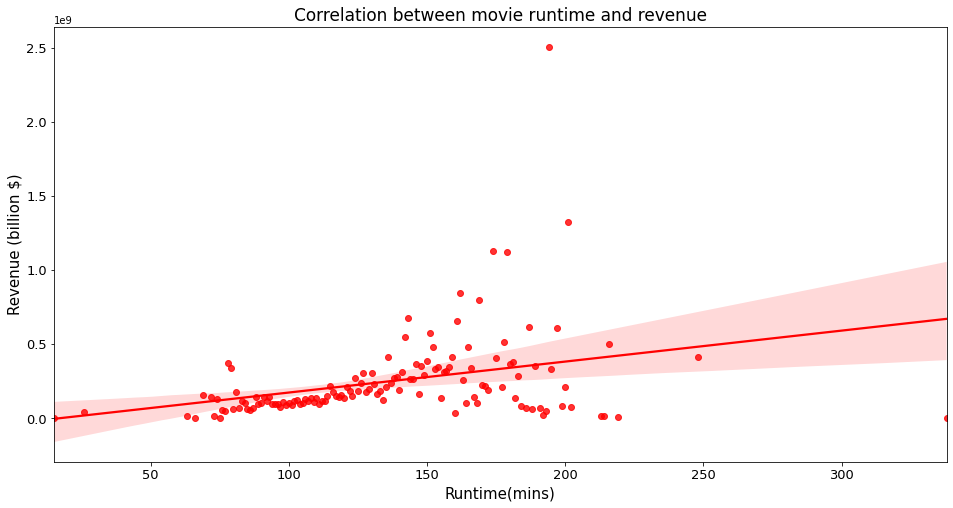

In [154]:
# Create the regression plot of runtime and revenue
plt.subplots(figsize=(16,8))
sns.regplot(x='runtime',y='revenue_adj',data=runtime_revenue,color='r')
plt.xlabel('Runtime(mins)', fontsize=15)
plt.ylabel('Revenue (billion $)', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Correlation between movie runtime and revenue', fontsize=17)
plt.show();

It seems to be that revenue is increase with the runtime, but the relationship is not so obvious.

In [110]:
#Create the new data frame that contains the revenue_type 
runtime_low_revenue=runtime_revenue.query('revenue_adj<153456063.52896655')
runtime_low_revenue['revenue_type']="low_revenue" 
runtime_high_revenue=runtime_revenue.query('revenue_adj>=153456063.52896655')
runtime_high_revenue['revenue_type']="high_revenue" 
runtime_revenue_type=runtime_high_revenue.append(runtime_low_revenue)
runtime_revenue_type.head()

<ipython-input-110-4d41947d1bb1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runtime_low_revenue['revenue_type']="low_revenue"
<ipython-input-110-4d41947d1bb1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runtime_high_revenue['revenue_type']="high_revenue"


,runtime,revenue_adj,revenue_type
4,69.0,1.557366e+08,high_revenue
11,78.0,3.737073e+08,high_revenue
12,79.0,3.402860e+08,high_revenue
14,81.0,1.769615e+08,high_revenue
48,115.0,2.206405e+08,high_revenue


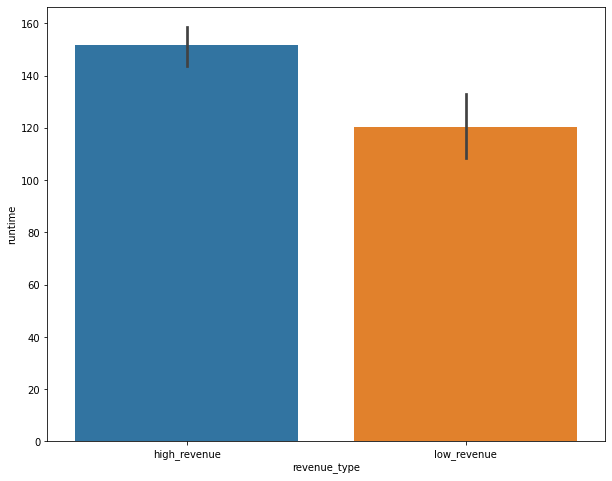

In [114]:
#Creat the bar chart for the different revenue type
plt.figure(figsize=(10,8))
ax =sns.barplot(data=runtime_revenue_type, x='revenue_type', y='runtime')
plt.show()

#### Property 3 : The influence of  the movie's popularity of the revenue?

In [128]:
#Make a new data frame that only contains revenue and popularity
popularity_revenue=df2.groupby('popularity',as_index=False)['revenue_adj'].mean().sort_values(by=['popularity'])
popularity_revenue.head()

,popularity,revenue_adj
0,0.010335,6.377150e+07
1,0.015727,3.612365e+07
2,0.015997,6.606877e+06
3,0.017498,1.353482e+08
4,0.017708,1.738911e+06


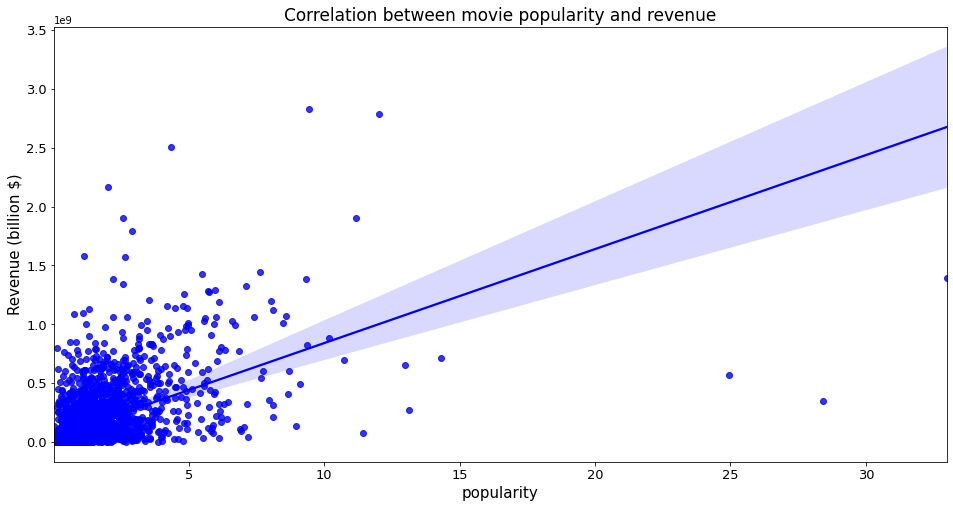

In [150]:
# Create the regression plot of popularity and revenue
plt.subplots(figsize=(16,8))
sns.regplot(x='popularity',y='revenue_adj',data=popularity_revenue,color='b')
plt.xlabel('popularity', fontsize=15)
plt.ylabel('Revenue (billion $)', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Correlation between movie popularity and revenue', fontsize=17)
plt.show();

It seems that popularity has no correlation with the revenue, most revenue and popularity are low.

In [121]:
popularity_low_revenue=popularity_revenue.query('revenue_adj<153456063.52896655')
popularity_low_revenue['revenue_type']="low_revenue" 
popularity_high_revenue=popularity_revenue.query('revenue_adj>=153456063.52896655')
popularity_high_revenue['revenue_type']="high_revenue" 
popularity_revenue_type=popularity_high_revenue.append(popularity_low_revenue)
popularity_revenue_type.head()

<ipython-input-121-caa1830655d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popularity_low_revenue['revenue_type']="low_revenue"
<ipython-input-121-caa1830655d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popularity_high_revenue['revenue_type']="high_revenue"


,popularity,revenue_adj,revenue_type
74,0.131526,2.962217e+08,high_revenue
94,0.142486,7.955384e+08,high_revenue
113,0.155768,6.169034e+08,high_revenue
114,0.157586,2.535000e+08,high_revenue
124,0.164515,3.338802e+08,high_revenue


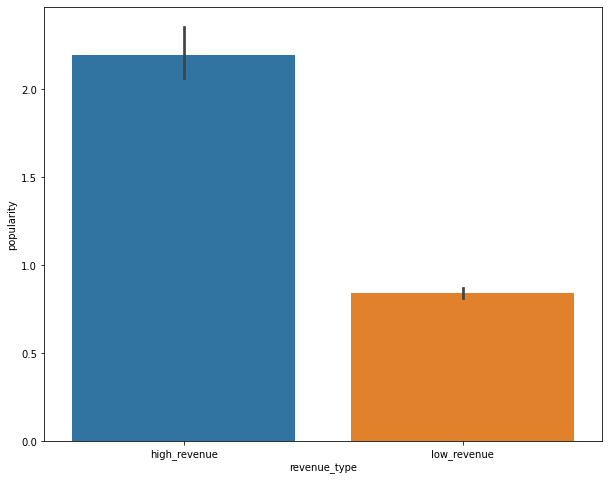

In [122]:
plt.figure(figsize=(10,8))
ax =sns.barplot(data=popularity_revenue_type, x='revenue_type', y='popularity')
plt.show()

Compare the low revenue and high revenue we can find that high revenue movies has much higher popularity.

#### Property 4 : The influence of  the movie's budget of the revenue?

In [131]:
#Make a new data frame that only contains revenue and budget
budget_revenue=df2.groupby('budget_adj',as_index=False)['revenue_adj'].mean().sort_values(by=['budget_adj'])
budget_revenue.head()

,budget_adj,revenue_adj
0,0.969398,1335.830503
1,1.309053,130.905285
2,3.000000,43.000000
3,4.519285,36.154278
4,5.006696,26.702377


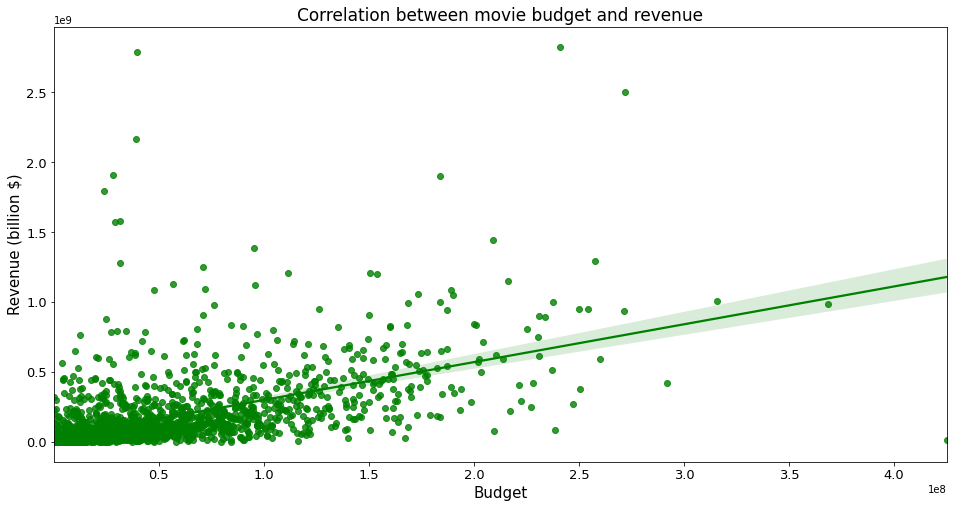

In [148]:
# Create the regression plot of budget and revenue
plt.subplots(figsize=(16,8))
sns.regplot(x='budget_adj',y='revenue_adj',data=budget_revenue,color='g')
plt.xlabel('Budget', fontsize=15)
plt.ylabel('Revenue (billion $)', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Correlation between movie budget and revenue', fontsize=17)
plt.show();

The revenue is increase with the increase of the budget, but most movie's budget and revenue are low.

In [134]:
budget_low_revenue=budget_revenue.query('revenue_adj<153456063.52896655')
budget_low_revenue['revenue_type']="low_revenue" 
budget_high_revenue=budget_revenue.query('revenue_adj>=153456063.52896655')
budget_high_revenue['revenue_type']="high_revenue" 
budget_revenue_type=budget_high_revenue.append(budget_low_revenue)
budget_revenue_type.head()

<ipython-input-134-3058c6f43d31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_low_revenue['revenue_type']="low_revenue"
<ipython-input-134-3058c6f43d31>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_high_revenue['revenue_type']="high_revenue"


,budget_adj,revenue_adj,revenue_type
19,2.248029e+02,2.289886e+08,high_revenue
23,1.577503e+04,2.033462e+08,high_revenue
26,3.272632e+04,3.246451e+08,high_revenue
102,1.002810e+06,2.339890e+08,high_revenue
115,1.201822e+06,3.004554e+08,high_revenue


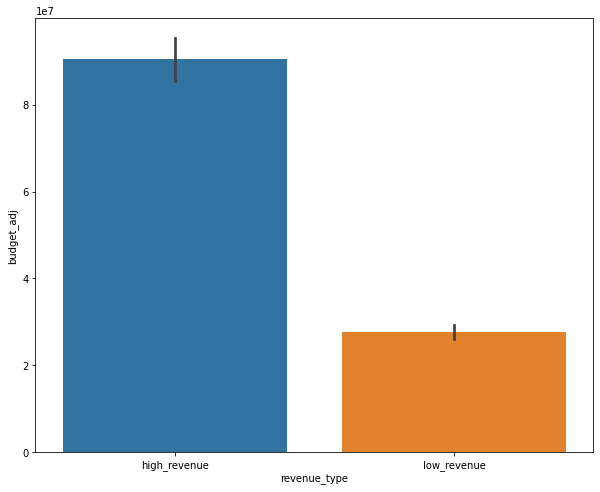

In [136]:
plt.figure(figsize=(10,8))
ax =sns.barplot(data=budget_revenue_type, x='revenue_type', y='budget_adj')
plt.show()

Compare the low revenue and high revenue we can find that high revenue movies has much higher budget.

#### Property 5 :Is there have any change of the movies revenue from year to year? 

In [140]:
#Make a new data frame that only contains revenue and release year
year_revenue=df2.groupby('release_year',as_index=False)['revenue_adj'].mean().sort_values(by=['revenue_adj'])
year_revenue.head()

,release_year,revenue_adj
26,1986,9.679349e+07
28,1988,1.032185e+08
6,1966,1.095802e+08
46,2006,1.101885e+08
25,1985,1.180791e+08


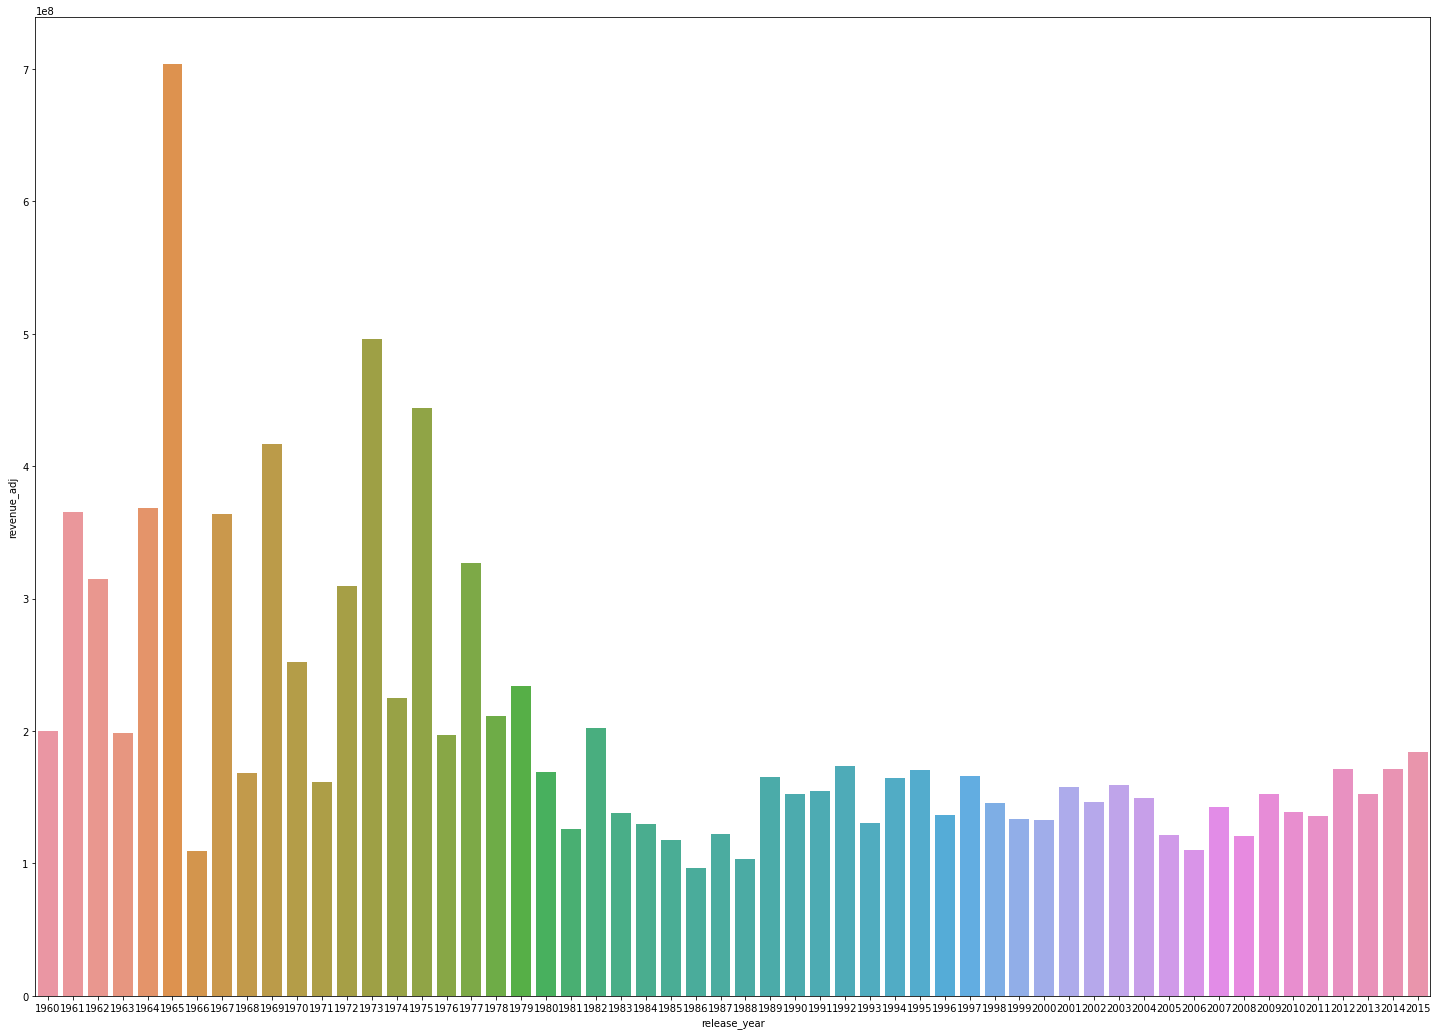

In [141]:
#Plot the bar plot for the revenues of different year
plt.figure(figsize=(25,18))
ax = sns.barplot(data=year_revenue, x='release_year', y='revenue_adj',)
plt.show()

From the bar chart above we can see that the average revenue is most highiest in 1965.

#### Property 6 : The influence of the movie's vote average to the revenue?

In [143]:
#Make a new data frame that only contains revenue and vote average
vote_revenue=df2.groupby('vote_average',as_index=False)['revenue_adj'].mean().sort_values(by=['vote_average'])
vote_revenue.head()

,vote_average,revenue_adj
0,2.2,7.000185e+04
1,3.3,1.063299e+07
2,3.4,5.386660e+07
3,3.5,9.718205e+06
4,3.6,5.642004e+07


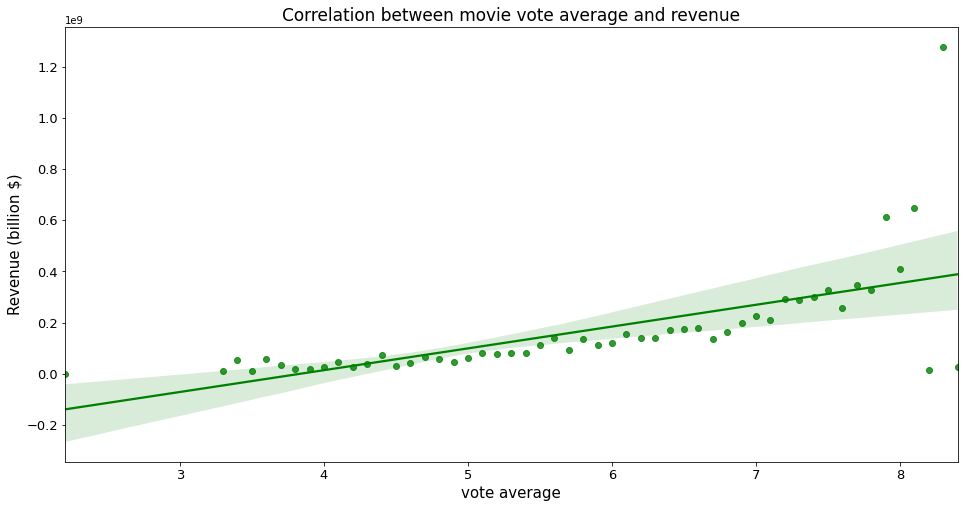

In [146]:
# Create the regression plot of vote average and revenue
plt.subplots(figsize=(16,8))
sns.regplot(x='vote_average',y='revenue_adj',data=vote_revenue,color='g')
plt.xlabel('vote average', fontsize=15)
plt.ylabel('Revenue (billion $)', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Correlation between movie vote average and revenue', fontsize=17)
plt.show();

The revenue od increase with the vote average.

In [162]:
vote_low_revenue=vote_revenue.query('revenue_adj<153456063.52896655')
vote_low_revenue['revenue_type']="low_revenue" 
vote_high_revenue=vote_revenue.query('revenue_adj>=153456063.52896655')
vote_high_revenue['revenue_type']="high_revenue" 
vote_revenue_type=vote_high_revenue.append(vote_low_revenue)
vote_revenue_type.head()

<ipython-input-162-822320d011c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vote_low_revenue['revenue_type']="low_revenue"
<ipython-input-162-822320d011c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vote_high_revenue['revenue_type']="high_revenue"


,vote_average,revenue_adj,revenue_type
29,6.1,1.569306e+08,high_revenue
32,6.4,1.694104e+08,high_revenue
33,6.5,1.748982e+08,high_revenue
34,6.6,1.792917e+08,high_revenue
36,6.8,1.633475e+08,high_revenue


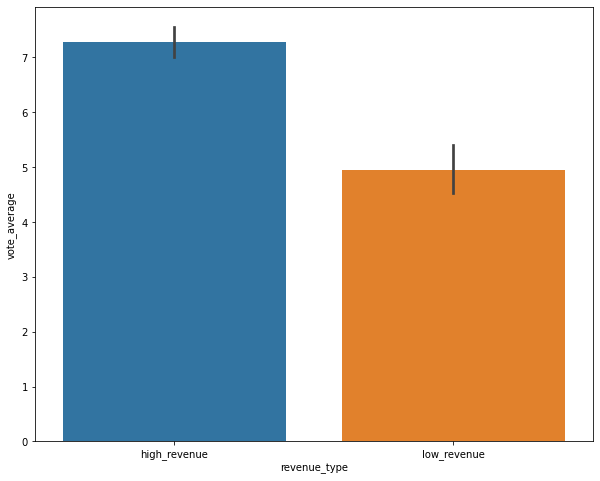

In [163]:
plt.figure(figsize=(10,8))
ax =sns.barplot(data=vote_revenue_type, x='revenue_type', y='vote_average')
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

### Insights and conclusion from the data analysis

#### Question 1: Which genres are most popular from year to year?
Although the most popalar movie's genre is always shift from year to year,the genre of Adventure is the most popular genre in 1962,1975,1981,1983,1986,1990,1999,2000,2008,2009,2010,2013,2014 and 2015,and it reached the highest popularity of all the genres in the 2005.


#### Question 2:What kinds of properties are associated with movies that have high revenues?

* **property 1 genre** The Animation, Adventure and Fantasy are the top 3 high revenue movie genres.
* **property 2 runtime** It seems that the revenue is increase with the runtime, but the runtime of the movies that has high revenue were just a litte bit higher than the low revenue.
* **property 3 popularity** From the regression plot, the popularity seem no relation with the revenue, but from the bar chart, the movies which have higher revenue, its popularity is much higher than the low revenue's.
* **property 4 budget** The revenue is increase with the increase of the budget, but most movie's budget and revenue are low. But compare the low revenue and high revenue we can find that high revenue movies has much higher budget.
* **property 5 release year** The revenue have been decreased year from year, and the average revenue is most highiest in 1965.
* **property 6 vote average** the revenue is incresed with the vote average and the higher vote average have higher revenue.
The movies that have high revenues have the properties below:
* The genres are Adventure, Animation,Fantasy.
* The runtime is high 
* The popularity is high
* The budget is high
* The release year is before 1980
* The vote average is high

### Analysis steps:
* Load the data and get the general information about the data. 
* Clean the data by drop the unneccessary columns and null values.
* Groupby the data for the further analysis.
* Explory the data according the questions and did the data visualization.


### Analysis packages:
* pandas
* numpy
* matplotlib
* seaborn